In [1]:
import numpy as np
import matplotlib.pyplot as plt

from hamiltonians import htotal
from line_gradient_colors import color_line_lc
from utils import probability

# Energy spectrum

In [2]:
Omegavals = np.linspace(0.4, 10, 100)
g = 0.35
hop = np.array([1, 2])
Ncells = 12
nmax = 50

h = []

for (i, Omega) in enumerate(Omegavals):
    h.append(htotal(hop, g, Omega, Ncells, nmax)[:])

h = np.array(h)

In [3]:
aval, avec = np.linalg.eigh(h)

In [4]:
loc = np.zeros([np.size(Omegavals), 2 * Ncells * (nmax + 1)])
slist = np.array([0, 2 * Ncells - 1])

for i in range(np.size(Omegavals)):
    loc[i, :] = probability(Ncells, nmax, slist, avec[i])

Text(0, 0.5, '$E/\\Omega $')

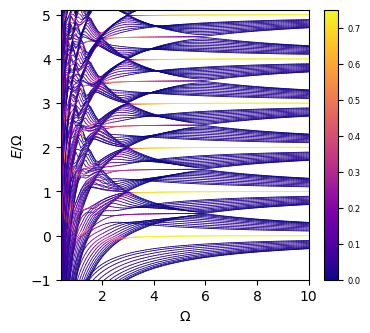

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(4, 3.5))

for q in range(2 * Ncells * 10):
    lc = color_line_lc(Omegavals, aval[:, q] / Omegavals, np.real(loc[:, q]), ax=ax,
                       cmap='plasma', n_interpolate=1,
                       vmin=0,
                       vmax=np.amax(np.real(loc)),
                       lw=0.6)

cbar = fig.colorbar(lc, ax=ax)
cbar.ax.tick_params(labelsize=6)

ax.set_ylim([-1, 5.1])
ax.set_xlim([0.4, 10])
ax.set_xlabel(r"$\Omega$")
ax.set_ylabel(r"$E/\Omega $")